# Task 4   ||THE SPARKS FOUNDATION||    
#GRIPAUGUST2024


Presented By - OM PRAKASH SAHOO

TASK-EXPLORATORY DATA ANALYSIS ON (TERRIORISM)

Step-1 #Importing libraries 

In [84]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from ipywidgets import interact , interact_manual
print('ALL LIBRARIES IMPORTED SUCCESSFULLY')

ALL LIBRARIES IMPORTED SUCCESSFULLY


##### *UPLOD THE DATA FROM GIVEN DATASET

|| Dataset details mentioned in Github Repository || 

In [85]:
df = pd.read_csv("globalterrorismdb_Encoded.csv", encoding="ISO-8859-1")
print("DATASET IS SUCCESSFULLY UPLOADED")

DATASET IS SUCCESSFULLY UPLOADED


*PRE-PROCESSING AND CLEANING DATA

In [86]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [88]:
df.shape

(181691, 135)

In [89]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [90]:
df = df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","location","summary","attacktype1_txt","targtype1_txt","gname","motive","weaptype1_txt","nkill","nwound","addnotes","extended"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes,extended
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN,0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN,0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN,0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN,0


In [91]:
df.rename(columns={"iyear":"YEAR","imonth":"MONTH","iday":"DAY","country_txt":"COUNTRY","region_txt":"REGION",
                   "provstate":"STATE","city":"CITY","latitude":"LATITUDE","longitude":"LONGITUDE","location":"LOCATION","summary":"SUMMARY",
                    "attacktype1_txt":"ATTACK_TYPE","targtype1_txt":"TARGET_TYPE","gname":"GNAME","weaptype1_txt":"WEAPON TYPE","nkill":"KILLED","nwound":"WOUNDED",
                     "addnotes":"ADDNOTES","targettype_txt":"TARGET TYPE","motive":"MOTIVE"},inplace=True)

In [92]:
df.head()

,YEAR,MONTH,DAY,COUNTRY,REGION,STATE,CITY,LATITUDE,LONGITUDE,LOCATION,SUMMARY,ATTACK_TYPE,TARGET_TYPE,GNAME,MOTIVE,WEAPON TYPE,KILLED,WOUNDED,ADDNOTES,extended
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN,0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN,0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN,0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN,0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   YEAR         181691 non-null  int64  
 1   MONTH        181691 non-null  int64  
 2   DAY          181691 non-null  int64  
 3   COUNTRY      181691 non-null  object 
 4   REGION       181691 non-null  object 
 5   STATE        181270 non-null  object 
 6   CITY         181256 non-null  object 
 7   LATITUDE     177135 non-null  float64
 8   LONGITUDE    177134 non-null  float64
 9   LOCATION     55495 non-null   object 
 10  SUMMARY      115562 non-null  object 
 11  ATTACK_TYPE  181691 non-null  object 
 12  TARGET_TYPE  181691 non-null  object 
 13  GNAME        181691 non-null  object 
 14  MOTIVE       50561 non-null   object 
 15  WEAPON TYPE  181691 non-null  object 
 16  KILLED       171378 non-null  float64
 17  WOUNDED      165380 non-null  float64
 18  ADDNOTES     28289 non-n

In [94]:
df.isnull().sum()

YEAR                0
MONTH               0
DAY                 0
COUNTRY             0
REGION              0
STATE             421
CITY              435
LATITUDE         4556
LONGITUDE        4557
LOCATION       126196
SUMMARY         66129
ATTACK_TYPE         0
TARGET_TYPE         0
GNAME               0
MOTIVE         131130
WEAPON TYPE         0
KILLED          10313
WOUNDED         16311
ADDNOTES       153402
extended            0
dtype: int64

In [95]:
df["KILLED"]=df["KILLED"].fillna(0)
df["WOUNDED"]=df["WOUNDED"].fillna(0)
df["CASUALTY"]=df["KILLED"]+df["WOUNDED"]

In [96]:
df.describe()

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE,KILLED,WOUNDED,extended,CASUALTY
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,0.045346,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,0.208063,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,0.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,1.000000,9574.000000


##EXPLORATORY DATA ANALYSIS


#YEARLY ANALYSIS OF TERROR ATTACKS

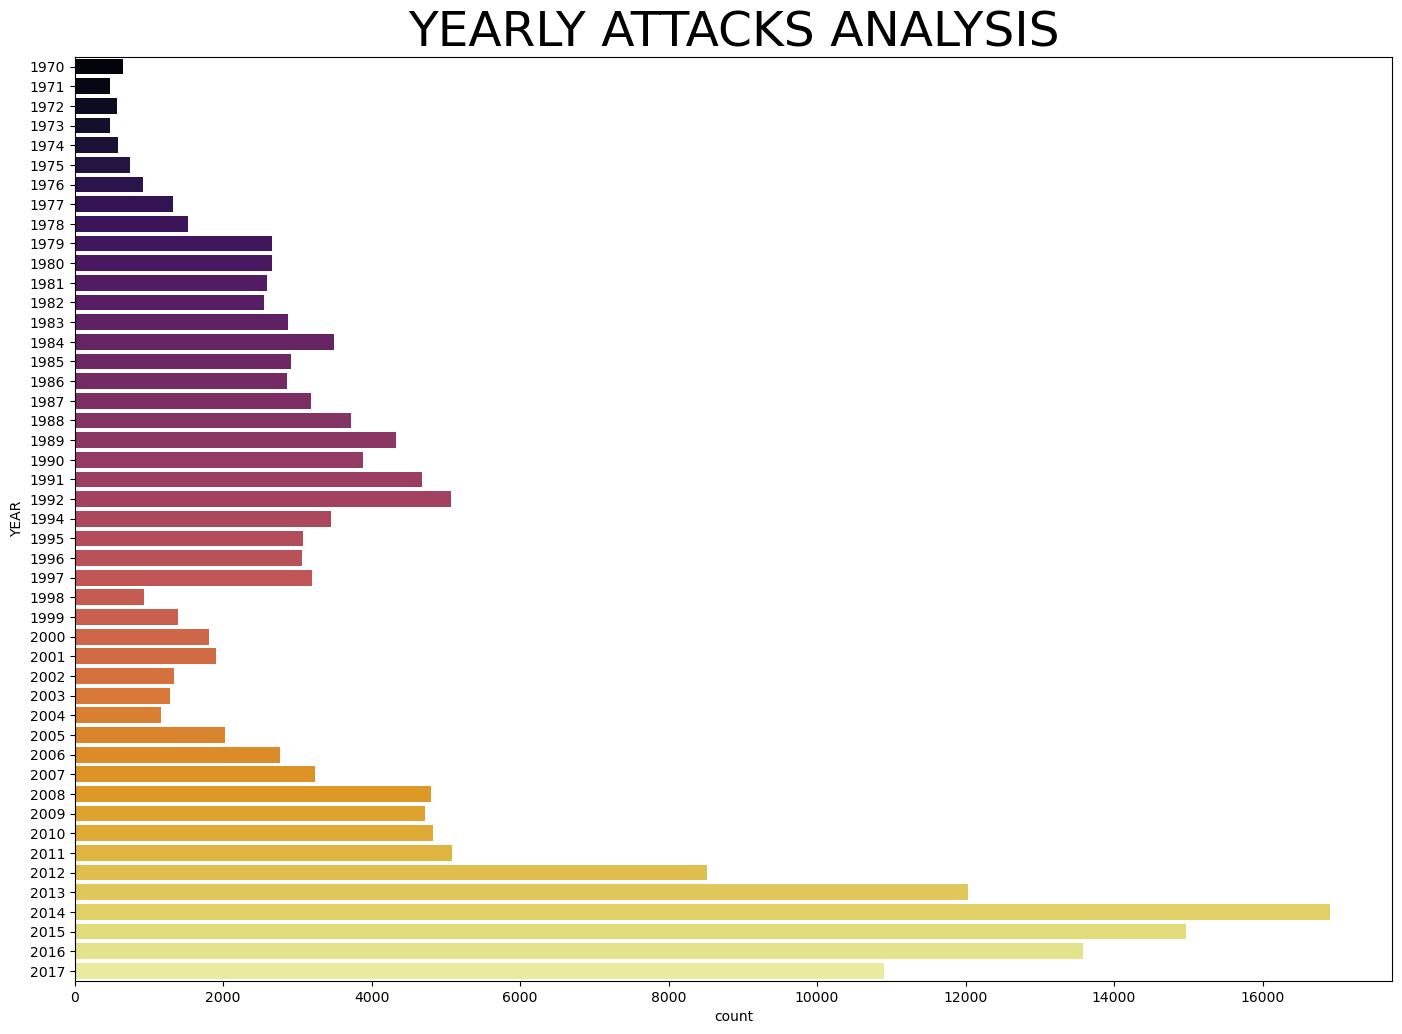

In [97]:
plt.rcParams['figure.figsize']=17,12
plt.title('YEARLY ATTACKS ANALYSIS',fontsize=35)
sns.countplot(y=df['YEAR'],palette='inferno')
plt.show()

In [98]:
#Number of people killed yearly due to terror attacks
pt=df[["YEAR","KILLED"]].groupby("YEAR").sum()
pt.head()

,KILLED
YEAR,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


Text(0, 0.5, 'PEOPLE COUNT')

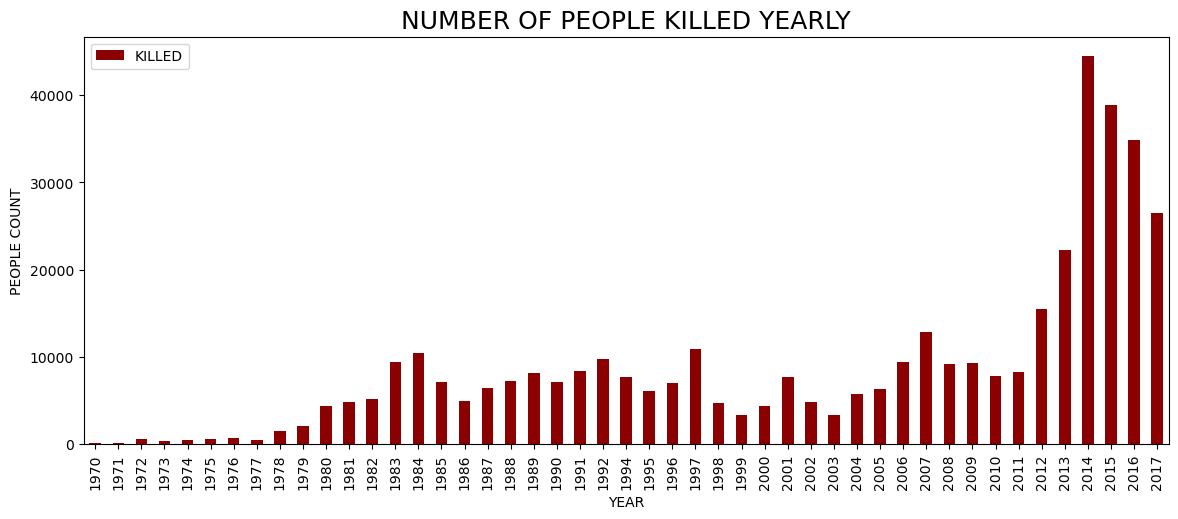

In [102]:
fig=plt.figure()
ax0=fig.add_subplot(3,1,1)

pt.plot(kind="bar",color="darkred",figsize=(14,18),ax=ax0)
ax0.set_title("NUMBER OF PEOPLE KILLED YEARLY",fontsize=18)
ax0.set_xlabel("YEAR")
ax0.set_ylabel("PEOPLE COUNT")

In [37]:
#Number of wounded people yearly in terror activities
pt=df[["YEAR","WOUNDED"]].groupby("YEAR").sum()
pt.head()

,WOUNDED
YEAR,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


Text(0, 0.5, 'PEOPLE COUNT')

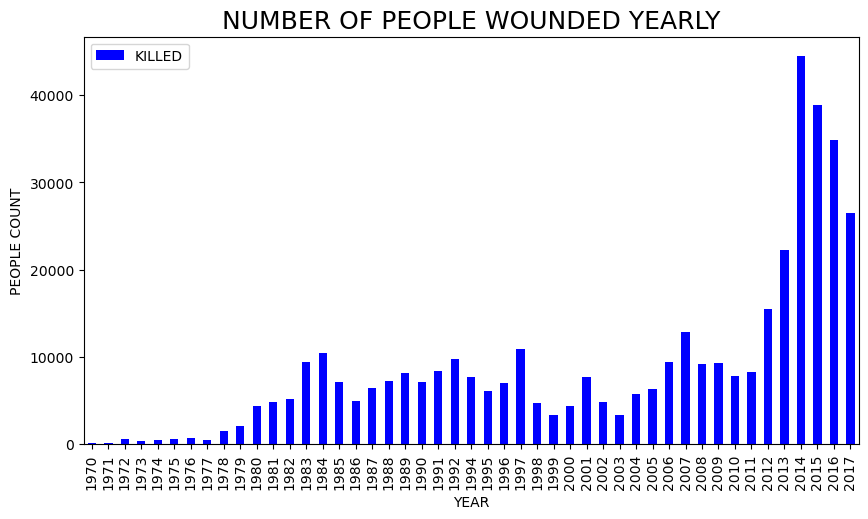

In [108]:
fig=plt.figure()
ax1=fig.add_subplot(3,1,3)

pt.plot(kind="bar",color="blue",figsize=(10,18),ax=ax1)
ax1.set_title("NUMBER OF PEOPLE WOUNDED YEARLY",fontsize=18)
ax1.set_xlabel("YEAR")
ax1.set_ylabel("PEOPLE COUNT")

#REGION-WISE ANALYSIS

In [109]:
print("MOST AFFECTED REGIONS \n",df["REGION"].value_counts())

MOST AFFECTED REGIONS 
 REGION
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64


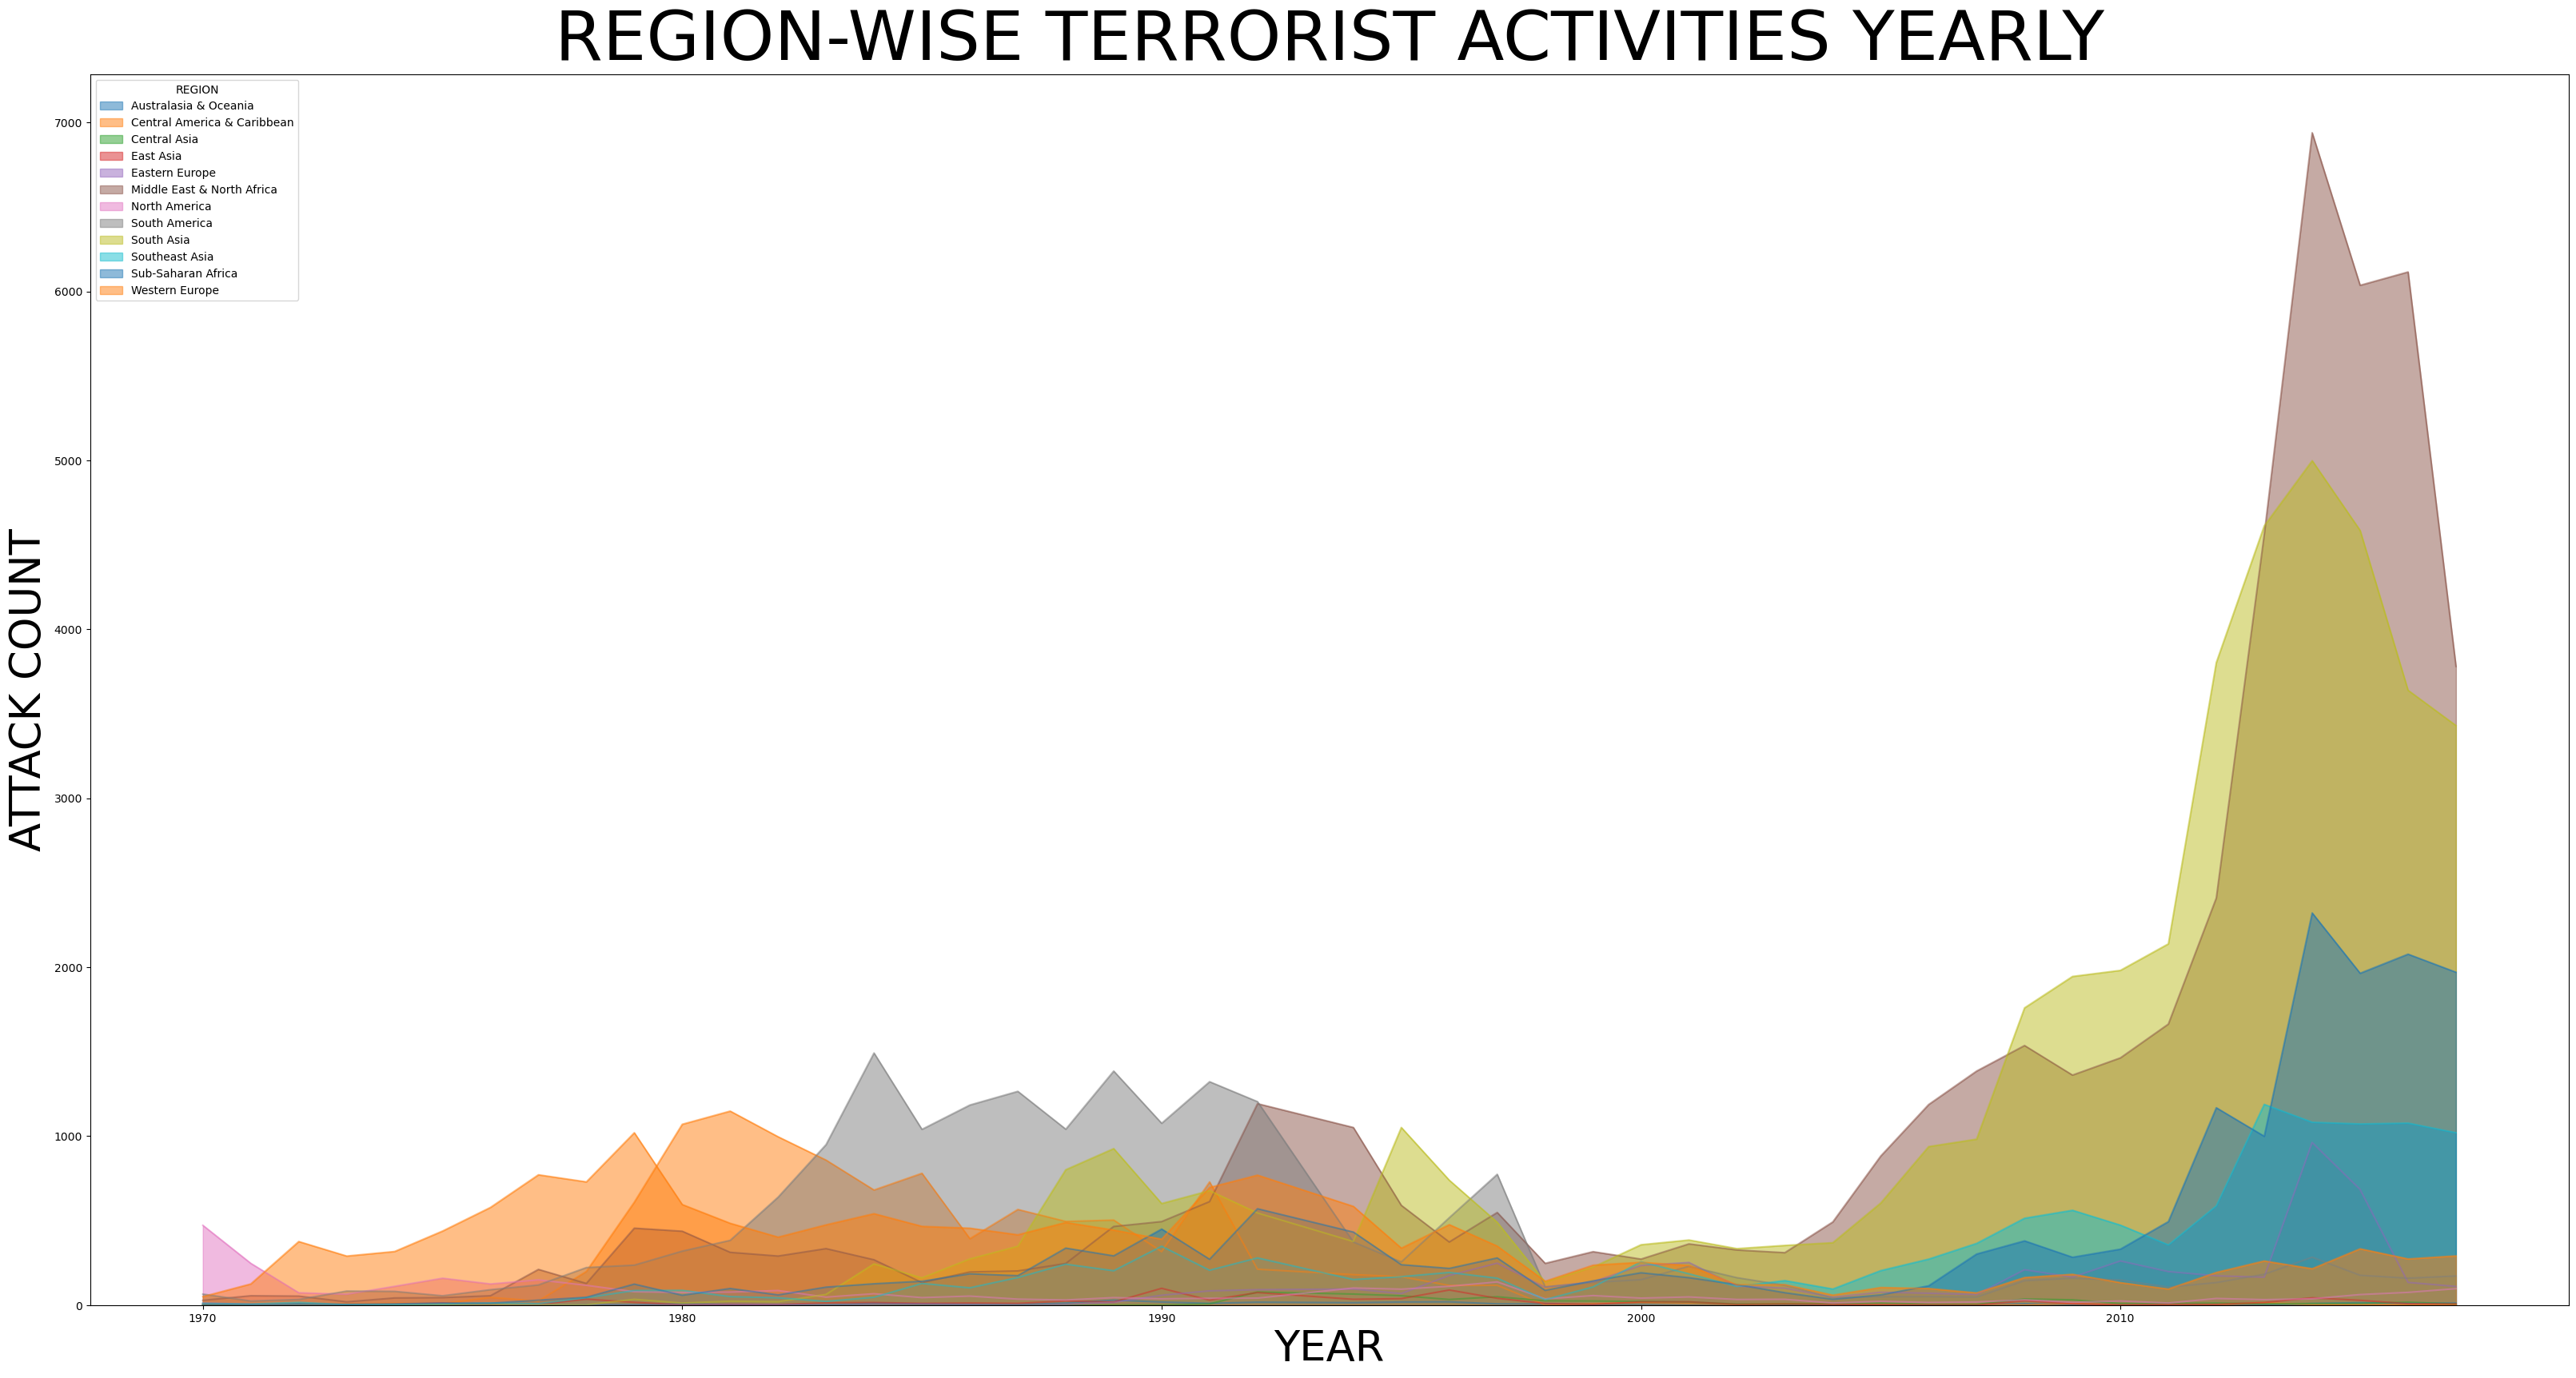

In [118]:
pd.crosstab(df.YEAR,df.REGION).plot(kind='area',stacked=False,figsize=(40,20))
plt.title('REGION-WISE TERRORIST ACTIVITIES YEARLY',fontsize=62)
plt.ylabel('ATTACK COUNT',fontsize=38)
plt.xlabel('YEAR',fontsize=38)
plt.show()

In [119]:
#Number of casualities get destructed due to terror activities
ar= df[["REGION","CASUALTY"]].groupby("REGION").sum().sort_values(by="CASUALTY",ascending=False)
ar

,CASUALTY
REGION,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


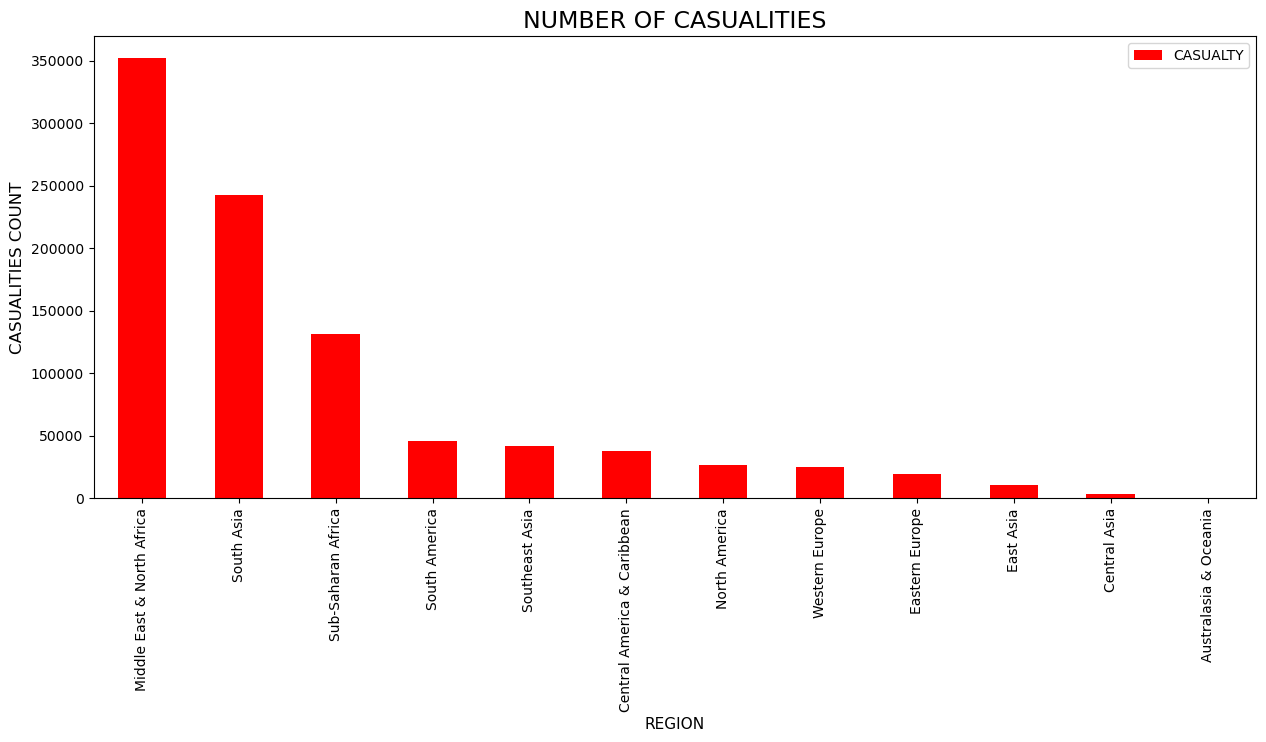

In [125]:
#Number of casualities is sum of people killed and wounded
ar.plot(kind='bar',color='red',figsize=(15,6))
plt.title('NUMBER OF CASUALITIES',fontsize=17)
plt.xlabel("REGION",fontsize=11)
plt.ylabel("CASUALITIES COUNT",fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [43]:
#Number of lilled people in each region
aq= df[["REGION","KILLED"]].groupby("REGION").sum().sort_values(by="KILLED",ascending=False)
aq

,KILLED
REGION,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [126]:
#Number of wounded people in each region
ae= df[["REGION","WOUNDED"]].groupby("REGION").sum().sort_values(by="WOUNDED",ascending=False)
ae

,WOUNDED
REGION,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


Text(0, 0.5, 'PEOPLE COUNT')

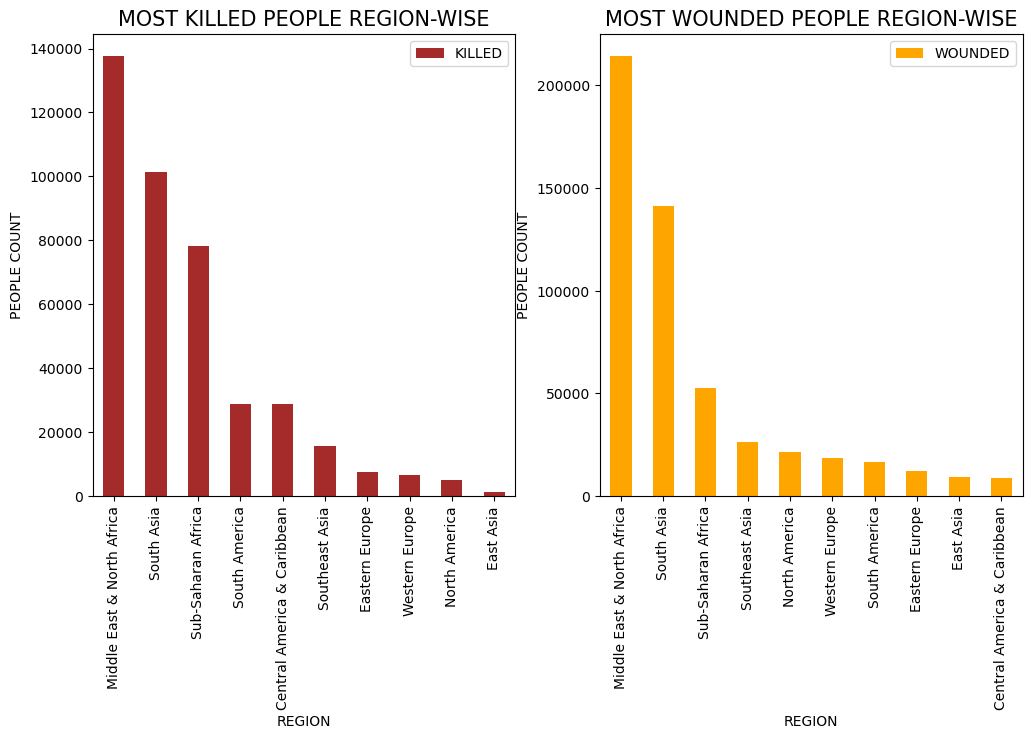

In [131]:
fig=plt.figure()
ax3=fig.add_subplot(1,2,1)
ax5=fig.add_subplot(1,2,2)

#PEOPLE KILLED DUE TO TERRIORISM##ACTIVE GROUP VS PEOPLE COUNT
aq[:10].plot(kind="bar",color="brown",figsize=(12,6),ax=ax3)
ax3.set_title("MOST KILLED PEOPLE REGION-WISE",fontsize=15)
ax3.set_xlabel("REGION")
ax3.set_ylabel("PEOPLE COUNT")

#PEOPLE WOUNDED DUE TO TERRIORISM##ACTIVE GROUP VS PEOPLE COUNT
ae[:10].plot(kind="bar",color="orange",figsize=(12,6),ax=ax5)
ax5.set_title("MOST WOUNDED PEOPLE REGION-WISE",fontsize=15)
ax5.set_xlabel("REGION")
ax5.set_ylabel("PEOPLE COUNT")

#COUNTRY-WISE ANALYSIS

In [132]:
at = df.COUNTRY.value_counts()[:15]
at

COUNTRY
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: count, dtype: int64

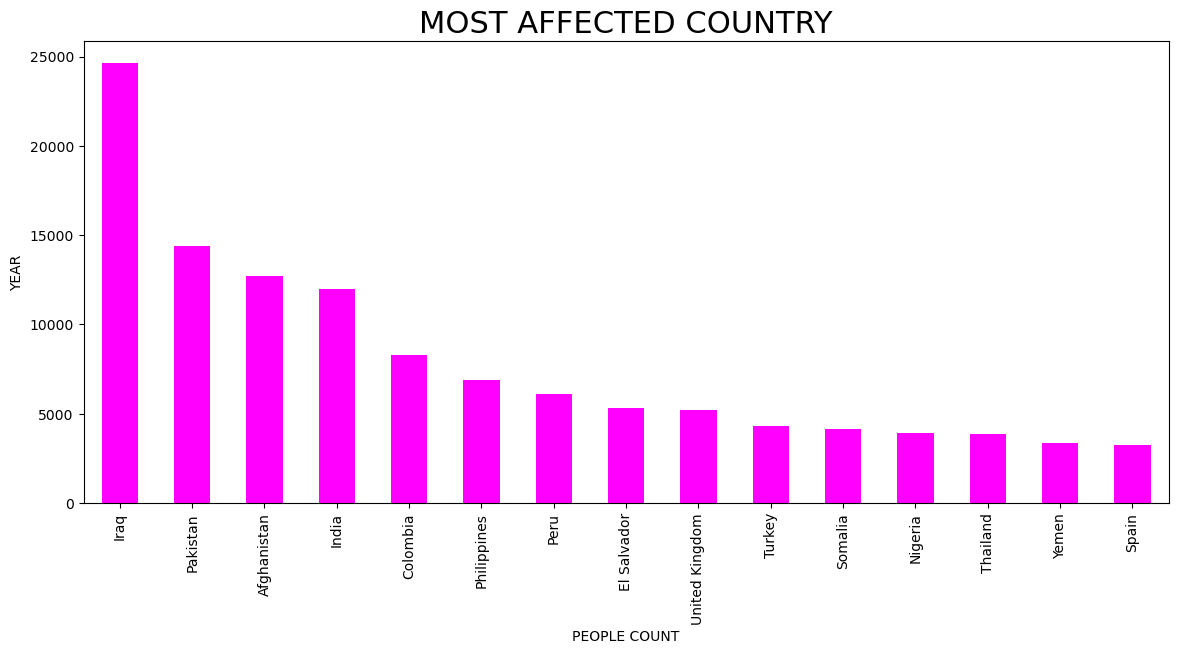

In [133]:
#Most number of people get affected in each country
at.plot(kind="bar",color="magenta",figsize=(14,6),)
plt.title("MOST AFFECTED COUNTRY",fontsize=22)
plt.xlabel("PEOPLE COUNT")
plt.xticks(rotation=90)
plt.ylabel("YEAR")
plt.show()

In [135]:
#Number of killed people in each country
dkill= df [["COUNTRY","KILLED"]].groupby("COUNTRY").sum().sort_values(by="KILLED",ascending=False)
dkill.head(10)

,KILLED
COUNTRY,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


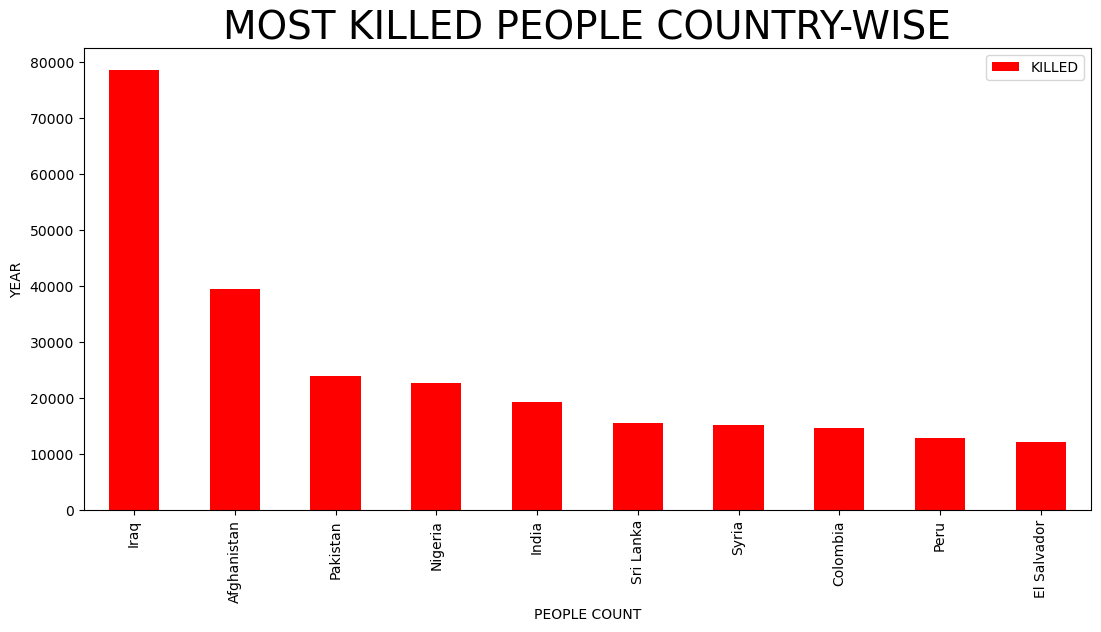

In [136]:
#visulaizing the number of killed people
dkill[:10].plot(kind="bar",color="red",figsize=(13,6),)
plt.title("MOST KILLED PEOPLE COUNTRY-WISE",fontsize=28)
plt.xlabel("PEOPLE COUNT")
plt.xticks(rotation=90)
plt.ylabel("YEAR")
plt.show()

In [137]:
#Most number of wounded people in each country
dwounded= df [["COUNTRY","WOUNDED"]].groupby("COUNTRY").sum().sort_values(by="WOUNDED",ascending=False)
dwounded.head(10)

,WOUNDED
COUNTRY,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


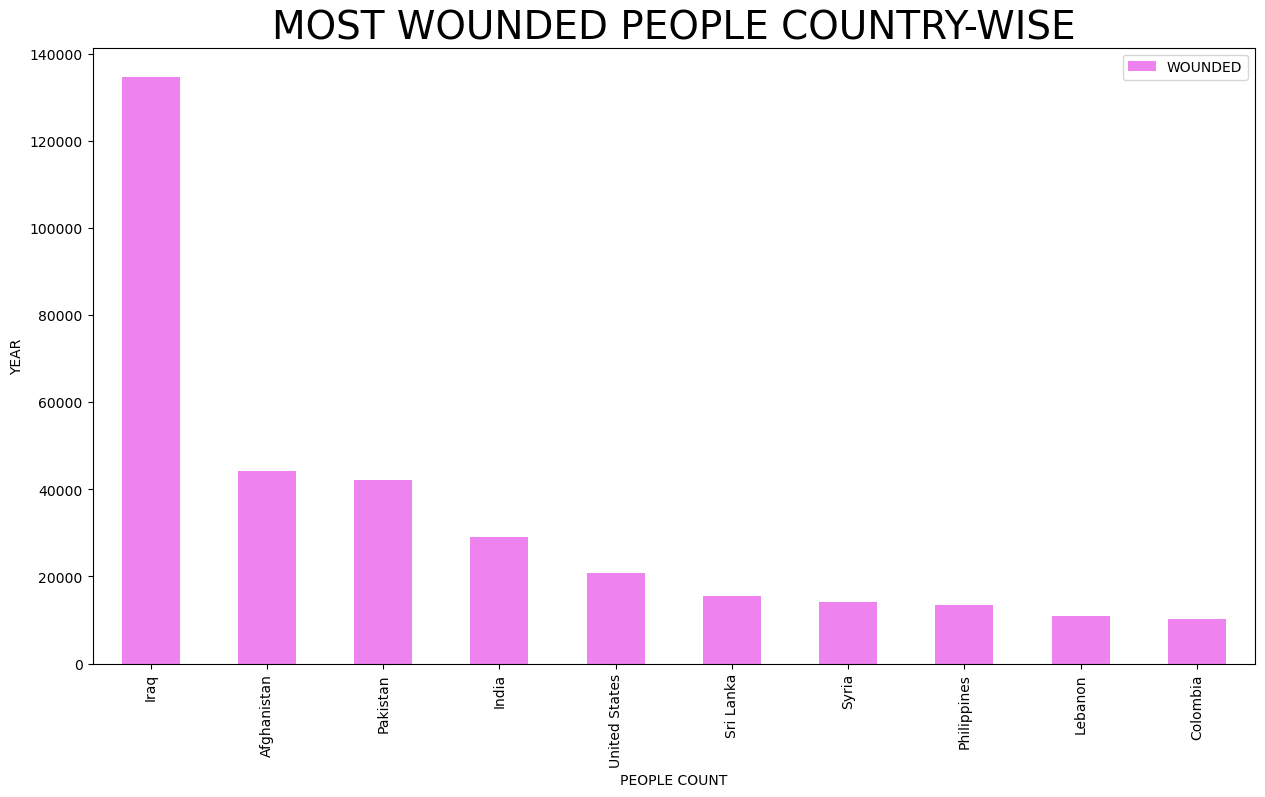

In [139]:
#Visulazing the number of wounded people
dwounded[:10].plot(kind="bar",color="Violet",figsize=(15,8),)
plt.title("MOST WOUNDED PEOPLE COUNTRY-WISE",fontsize=28)
plt.xlabel("PEOPLE COUNT")
plt.xticks(rotation=90)
plt.ylabel("YEAR")
plt.show()

In [140]:
ct=df["CITY"].value_counts()[1:11]
ct

CITY
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: count, dtype: int64

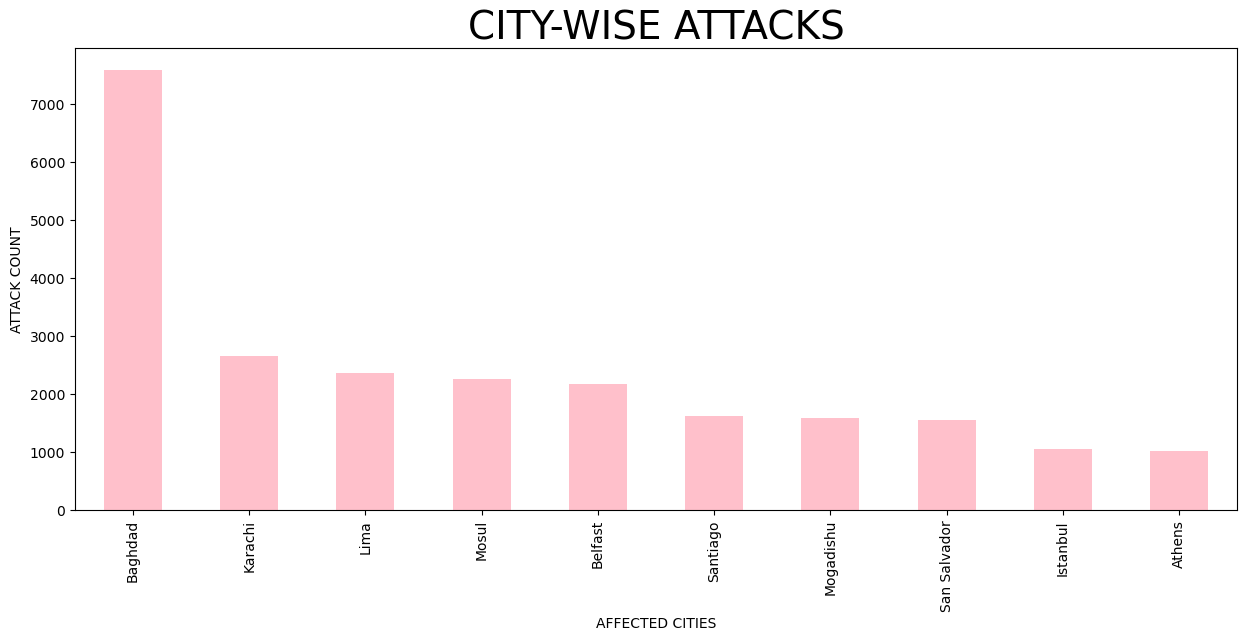

In [141]:
#Most affected cities due to terror activities
ct.plot(kind="bar",color="pink",figsize=(15,6),)
plt.title("CITY-WISE ATTACKS",fontsize=28)
plt.xlabel("AFFECTED CITIES")
plt.xticks(rotation=90)
plt.ylabel("ATTACK COUNT")
plt.show()

In [142]:
#Number of casualities harmed in each city
tc=df[["CITY","CASUALTY"]].groupby("CITY").sum().sort_values(by="CASUALTY",ascending=False).drop("unknown")
tc.head(10)

,CASUALTY
CITY,
Baghdad,77876.0
Unknown,35450.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
Mogadishu,8868.0
Kabul,8466.0
Beirut,7257.0
Kirkuk,6636.0


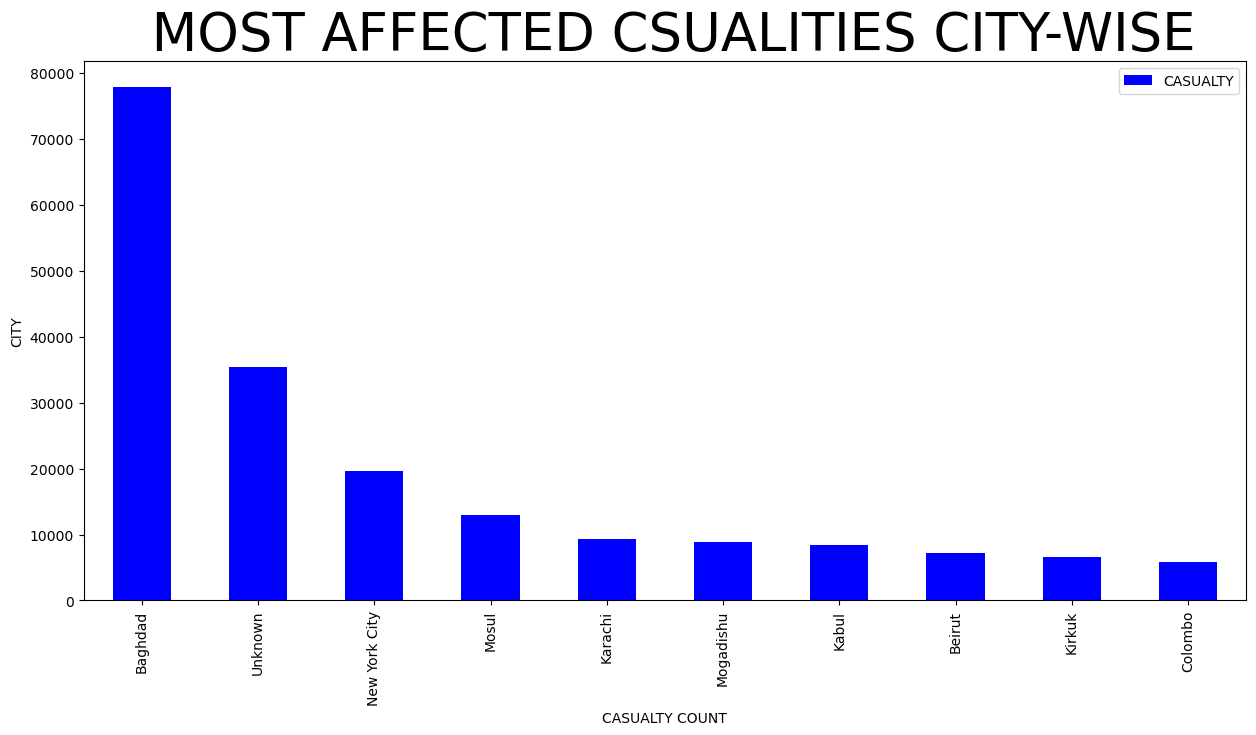

In [144]:
#Visulazing the harmed casualty citywise
tc[:10].plot(kind="bar",color="blue",figsize=(15,7),)
plt.title(" MOST AFFECTED CSUALITIES CITY-WISE",fontsize=38)
plt.xlabel("CASUALTY COUNT")
plt.xticks(rotation=90)
plt.ylabel("CITY")
plt.show()

In [145]:
#Number of killed people in each city
dk=df[["CITY","KILLED"]].groupby("CITY").sum().sort_values(by="KILLED",ascending=False).drop("unknown")
dk.head(10)

,KILLED
CITY,
Unknown,22647.0
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0


In [146]:
#Number of wounded people in each city
dw=df[["CITY","WOUNDED"]].groupby("CITY").sum().sort_values(by="WOUNDED",ascending=False).drop("unknown")
dk.head(10)

,KILLED
CITY,
Unknown,22647.0
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
New York City,2838.0
Tikrit,2679.0
Kabul,2493.0
Ramadi,2313.0


Text(0, 0.5, 'PEOPLE COUNT')

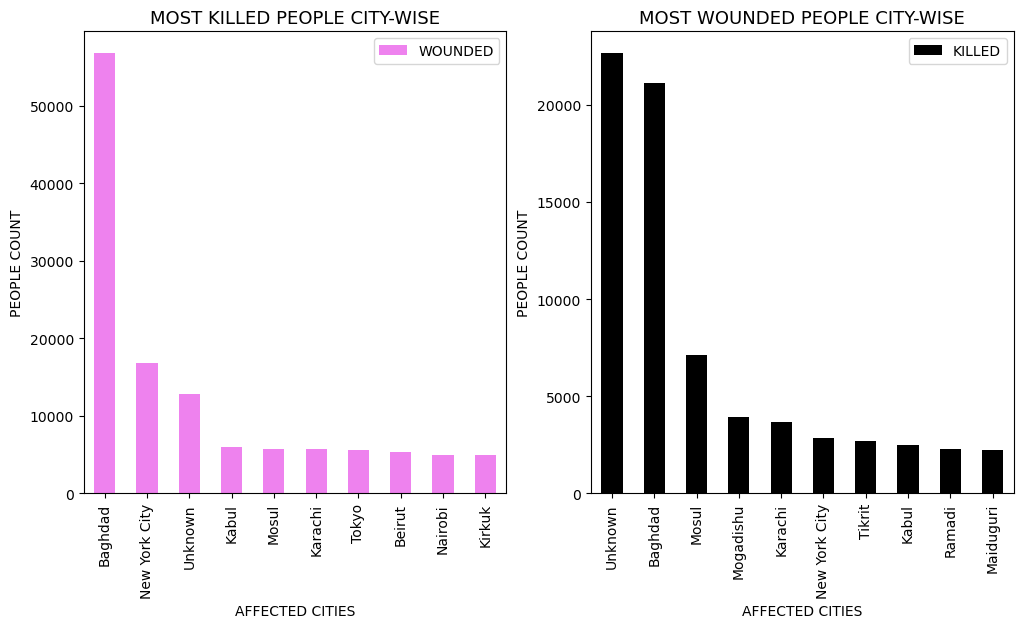

In [150]:
fig=plt.figure()
ax3=fig.add_subplot(1,2,1)
ax5=fig.add_subplot(1,2,2)

# VISULAZING PEOPLE KILLED DUE TO TERRIORISM
dw[:10].plot(kind="bar",color="violet",figsize=(12,6),ax=ax3)
ax3.set_title("MOST KILLED PEOPLE CITY-WISE",fontsize=13)
ax3.set_xlabel("AFFECTED CITIES")
ax3.set_ylabel("PEOPLE COUNT")

#VISULAZING PEOPLE WOUNDED DUE TO TERRIORISM#
dk[:10].plot(kind="bar",color="black",figsize=(12,6),ax=ax5)
ax5.set_title("MOST WOUNDED PEOPLE CITY-WISE",fontsize=13)
ax5.set_xlabel("AFFECTED CITIES")
ax5.set_ylabel("PEOPLE COUNT")

#GROUP-WISE ANALYSIS

In [151]:
tg=df['GNAME'].value_counts()[1:10]
tg

GNAME
Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: count, dtype: int64

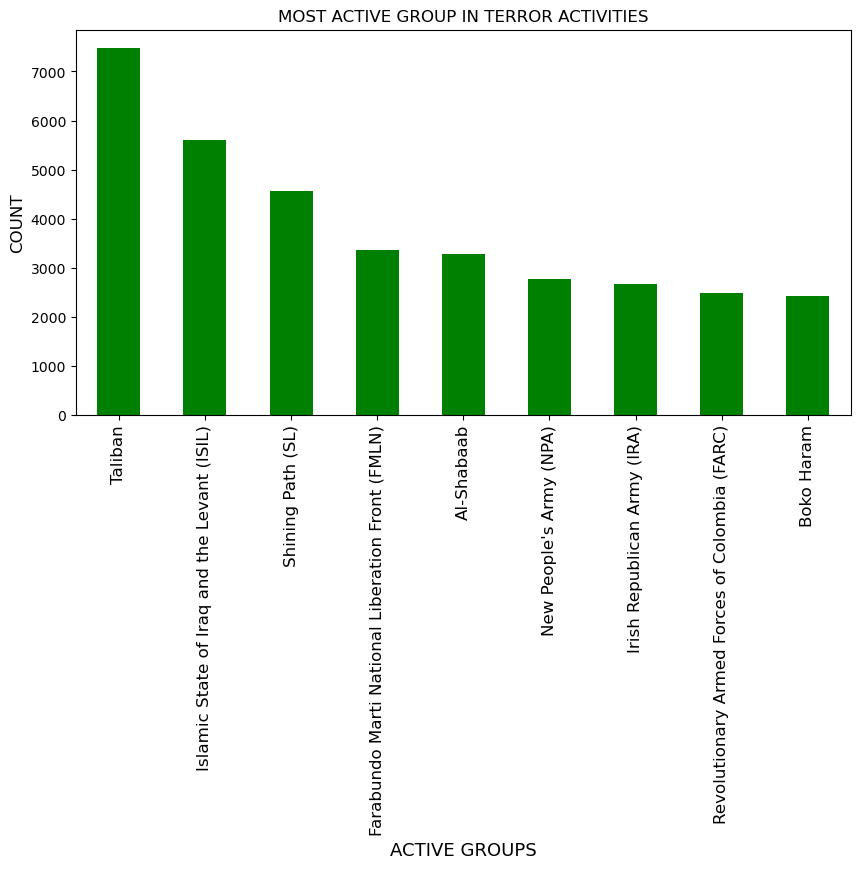

In [155]:
#Visulazing Most active group as per terriorism
tg.plot(kind="bar",color="green",figsize=(10,5))
plt.title("MOST ACTIVE GROUP IN TERROR ACTIVITIES")
plt.xlabel("ACTIVE GROUPS",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("COUNT",fontsize=12)
plt.show()

In [153]:
#Number of harmed casulaty due to the groups
rc=df[["GNAME","CASUALTY"]].groupby("GNAME").sum().sort_values(by="CASUALTY",ascending=False)
rc.head(10)

,CASUALTY
GNAME,
Unknown,322706.0
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0


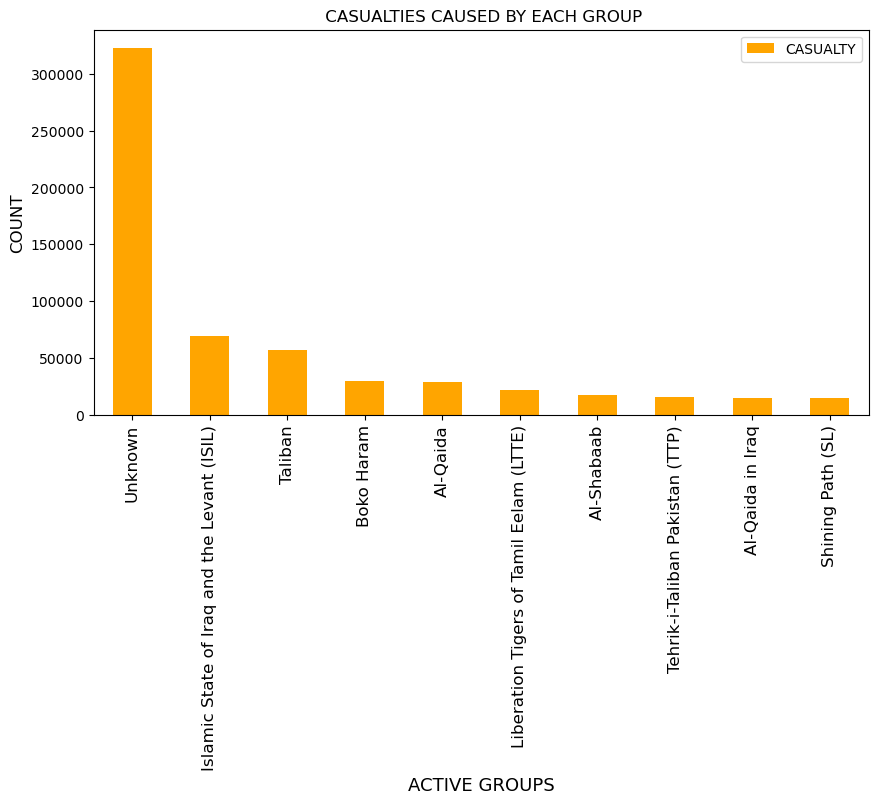

In [154]:
#Visulazing the harmed casuality by each group
rc.head(10).plot(kind="bar",color="orange",figsize=(10,5))
plt.title(" CASUALTIES CAUSED BY EACH GROUP")
plt.xlabel("ACTIVE GROUPS",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("COUNT",fontsize=12)
plt.show()

In [156]:
#Number of killed people by each group
kill=df[["GNAME","KILLED"]].groupby("GNAME").sum().sort_values(by="KILLED",ascending=False)
kill.head(10)

,KILLED
GNAME,
Unknown,112367.0
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0


In [157]:
#Number of wounded  people by each group
wound=df[["GNAME","WOUNDED"]].groupby("GNAME").sum().sort_values(by="WOUNDED",ascending=False)
wound.head(10)

,WOUNDED
GNAME,
Unknown,210339.0
Islamic State of Iraq and the Levant (ISIL),30672.0
Taliban,27932.0
Al-Qaida,24512.0
Liberation Tigers of Tamil Eelam (LTTE),11031.0
Al-Qaida in Iraq,10343.0
Tehrik-i-Taliban Pakistan (TTP),9532.0
Boko Haram,9473.0
Al-Shabaab,7624.0


Text(0, 0.5, 'PEOPLE COUNT')

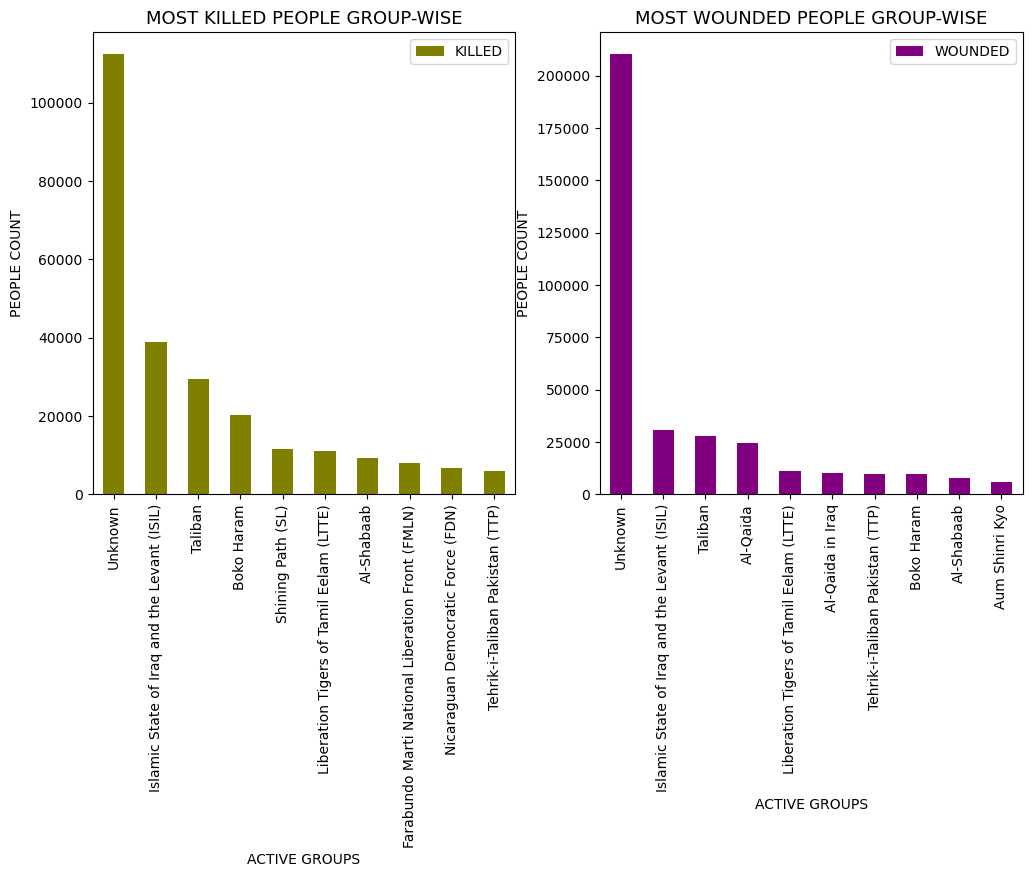

In [160]:
fig=plt.figure()
ax3=fig.add_subplot(1,2,1)
ax5=fig.add_subplot(1,2,2)

#VISULAZING THE KILLED PEOPLE AS PER GROUP
kill[:10].plot(kind="bar",color="olive",figsize=(12,6),ax=ax3)
ax3.set_title("MOST KILLED PEOPLE GROUP-WISE",fontsize=13)
ax3.set_xlabel("ACTIVE GROUPS")
ax3.set_ylabel("PEOPLE COUNT")

#VISULAIZING THE WOUNDED PEOPLE AS PER GROUP
wound[:10].plot(kind="bar",color="purple",figsize=(12,6),ax=ax5)
ax5.set_title("MOST WOUNDED PEOPLE GROUP-WISE",fontsize=13)
ax5.set_xlabel("ACTIVE GROUPS")
ax5.set_ylabel("PEOPLE COUNT")

#ATTACK TYPE ANALYSIS

In [161]:
aatt=df['ATTACK_TYPE'].value_counts()
aatt

ATTACK_TYPE
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

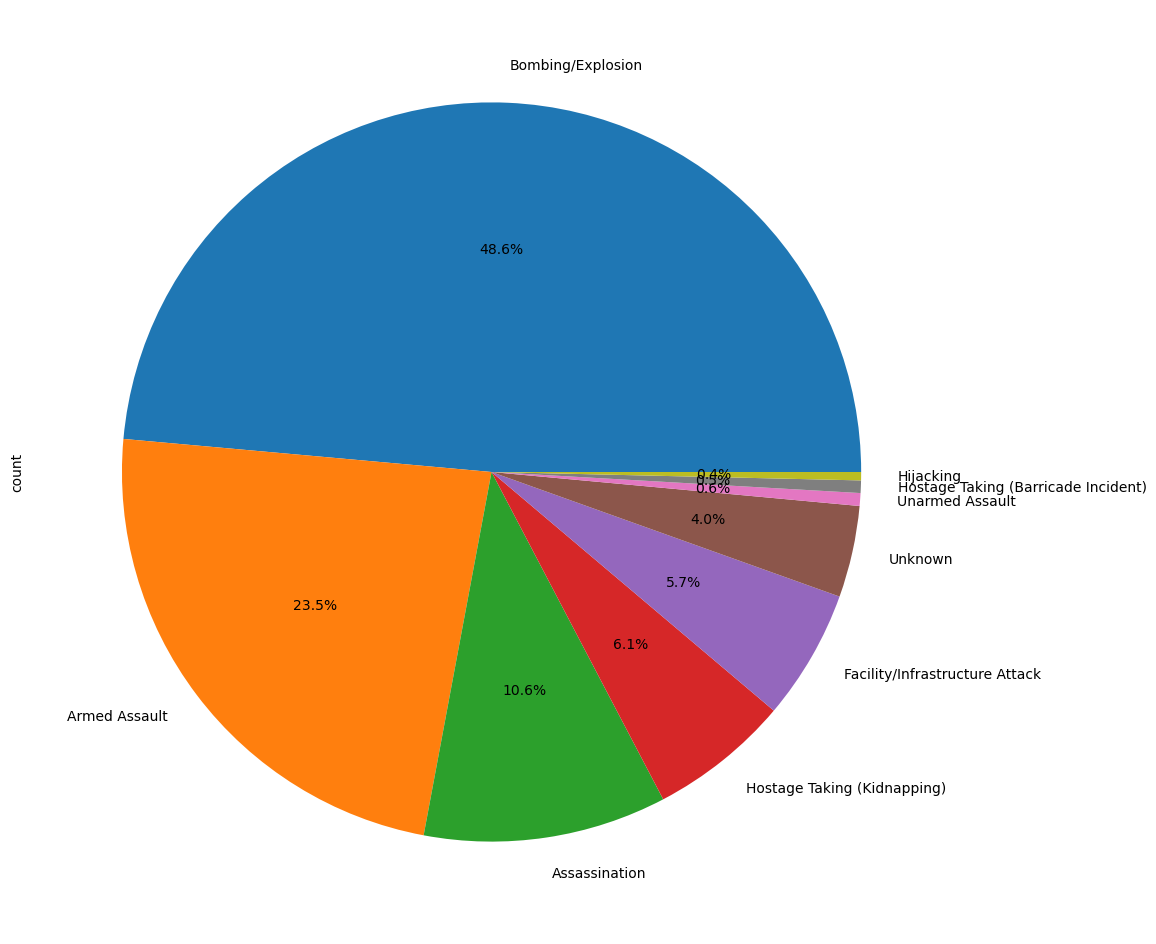

In [162]:
#PIE CHAR REPRESENTATION OF MOST TPE OF ATTACKS
df['ATTACK_TYPE'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show

In [68]:
#Number of people get killed by each attack type
akill=df[["ATTACK_TYPE","KILLED"]].groupby("ATTACK_TYPE").sum().sort_values(by="KILLED",ascending=False)
akill.head(10)

,KILLED
ATTACK_TYPE,
Armed Assault,160297.0
Bombing/Explosion,157321.0
Unknown,32381.0
Assassination,24920.0
Hostage Taking (Kidnapping),24231.0
Hostage Taking (Barricade Incident),4478.0
Hijacking,3718.0
Facility/Infrastructure Attack,3642.0
Unarmed Assault,880.0


In [69]:
#Number of wounded people by each attack type
awound=df[["ATTACK_TYPE","WOUNDED"]].groupby("ATTACK_TYPE").sum().sort_values(by="WOUNDED",ascending=False)
awound.head(10)

,WOUNDED
ATTACK_TYPE,
Bombing/Explosion,372686.0
Armed Assault,77366.0
Hijacking,17001.0
Unknown,14725.0
Unarmed Assault,14027.0
Assassination,13887.0
Hostage Taking (Kidnapping),6446.0
Hostage Taking (Barricade Incident),3966.0
Facility/Infrastructure Attack,3765.0


Text(0, 0.5, 'PEOPLE COUNT')

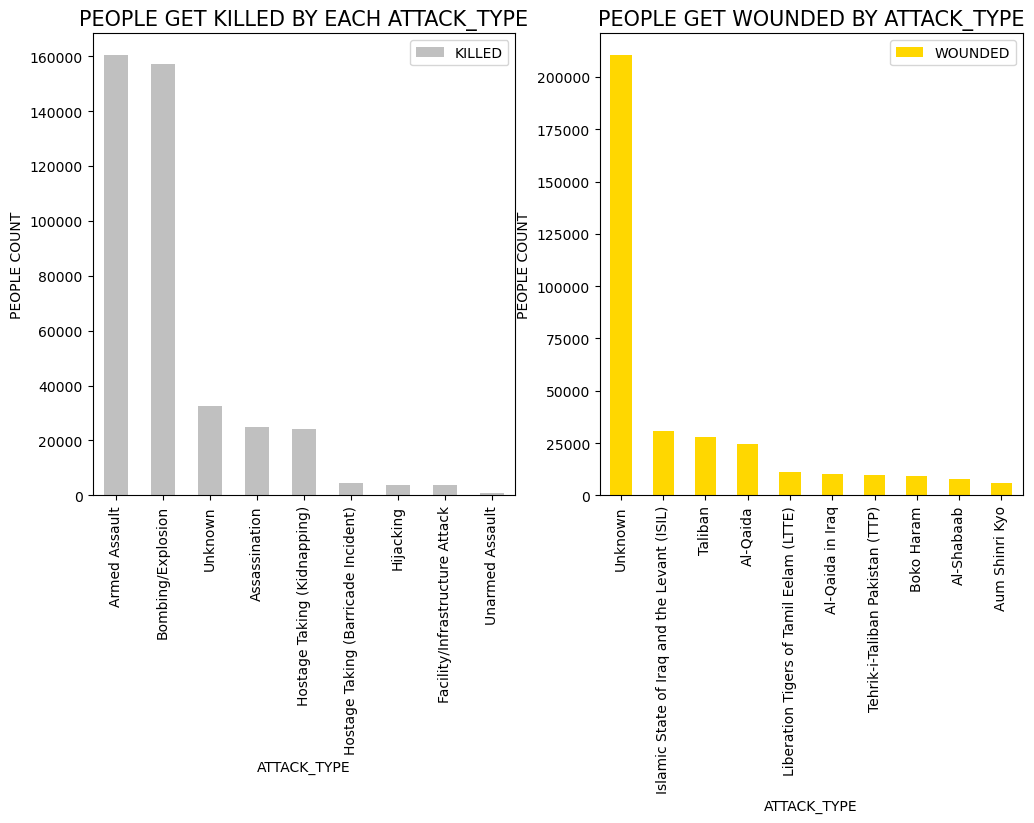

In [70]:
fig=plt.figure()
ax3=fig.add_subplot(1,2,1)
ax5=fig.add_subplot(1,2,2)

# VISULAZING PEOPLE KILLED DUE TO EACH ATTACK TYPE
akill[:10].plot(kind="bar",color="silver",figsize=(12,6),ax=ax3)
ax3.set_title("PEOPLE GET KILLED BY EACH ATTACK_TYPE",fontsize=15)
ax3.set_xlabel("ATTACK_TYPE")
ax3.set_ylabel("PEOPLE COUNT")

#VISULAZING PEOPLE WOUNDED DUE TO EACH ATTACK TYPE
wound[:10].plot(kind="bar",color="gold",figsize=(12,6),ax=ax5)
ax5.set_title("PEOPLE GET WOUNDED BY ATTACK_TYPE",fontsize=15)
ax5.set_xlabel("ATTACK_TYPE")
ax5.set_ylabel("PEOPLE COUNT")

#TARGET TYPE ANALYSIS

In [71]:
ttt=df["TARGET_TYPE"].value_counts()
ttt

TARGET_TYPE
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

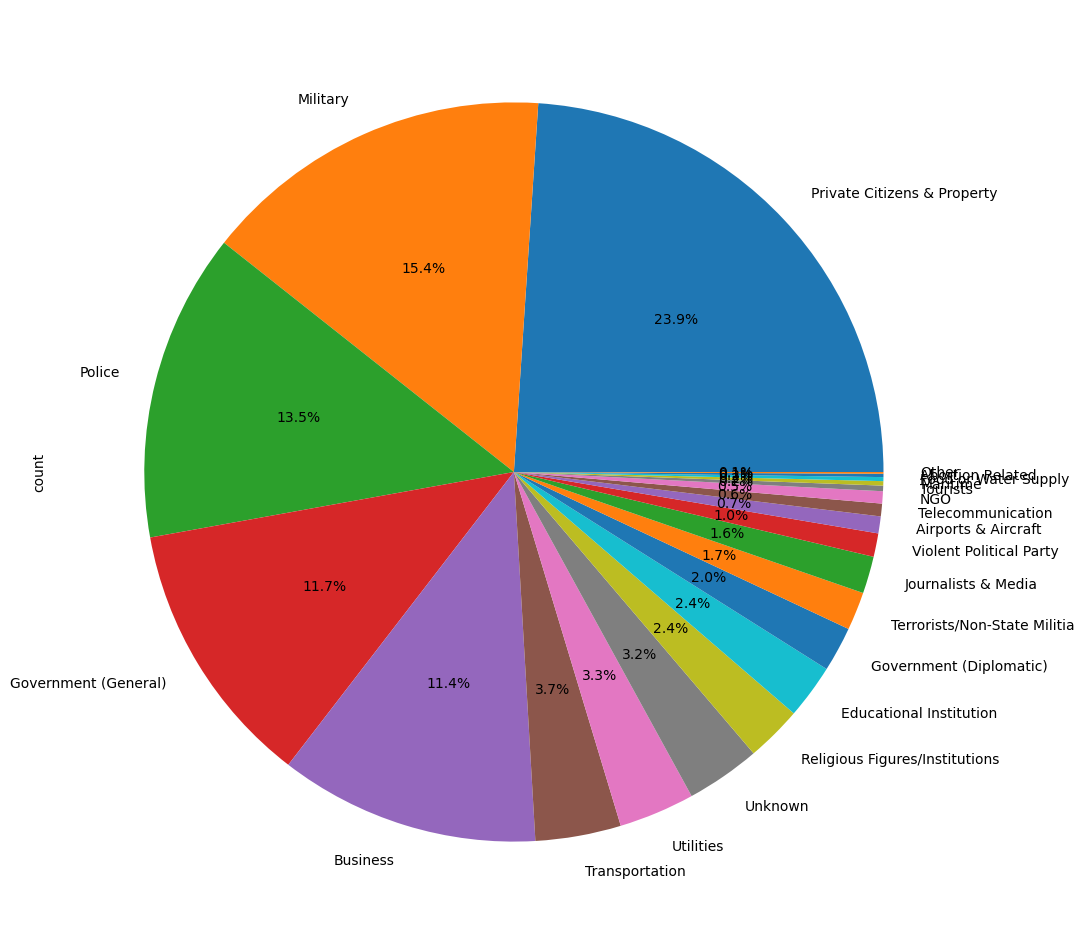

In [72]:
#PIE CHART REPRSENTAION OF TARGET TYPE
df['TARGET_TYPE'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show

#TARGET TYPE VS YEAR

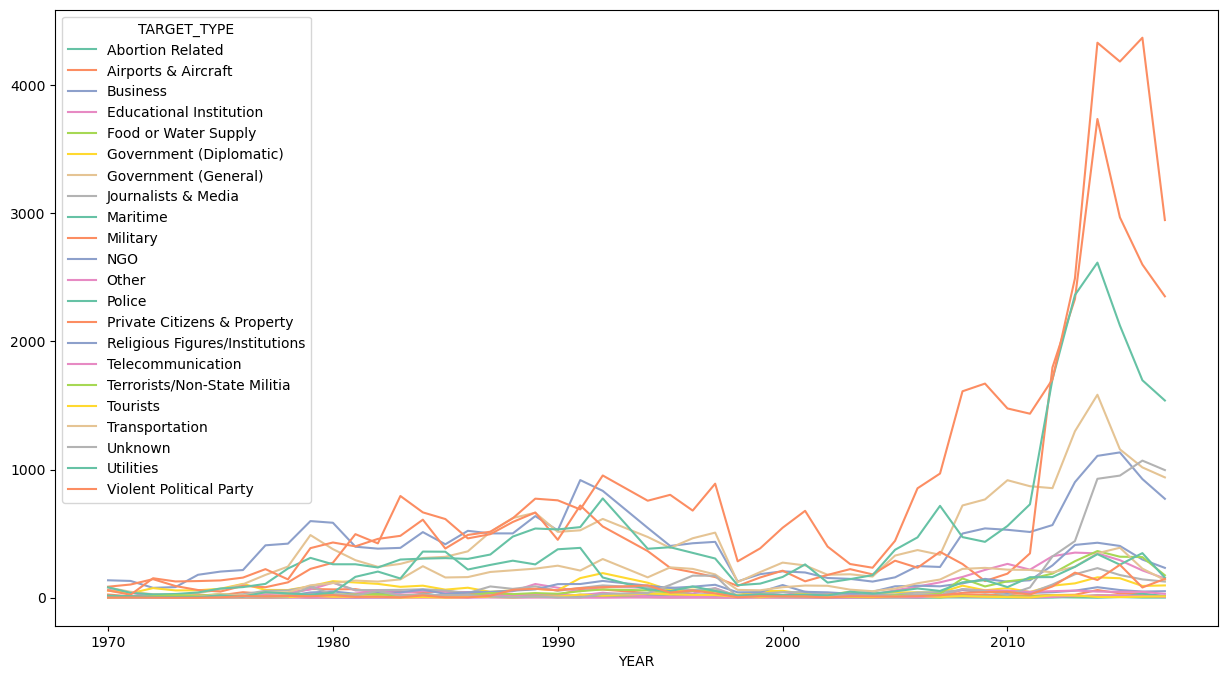

In [73]:
dff=pd.crosstab(df.YEAR,df.TARGET_TYPE)
dff.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [74]:
#Csulaties got harmed due to teach target type
acc=df[["TARGET_TYPE","CASUALTY"]].groupby("TARGET_TYPE").sum().sort_values(by="CASUALTY",ascending=False)
acc.head(10)

,CASUALTY
TARGET_TYPE,
Private Citizens & Property,319176.0
Military,177085.0
Police,118407.0
Business,78018.0
Government (General),67255.0
Transportation,54595.0
Religious Figures/Institutions,37890.0
Terrorists/Non-State Militia,17311.0
Educational Institution,13972.0


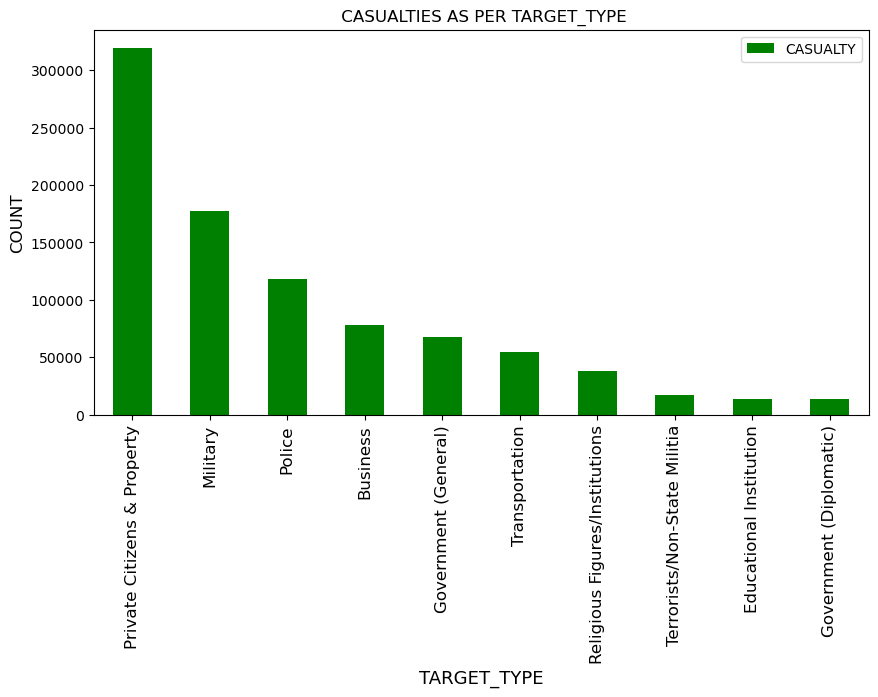

In [164]:
#VISULAZING THE DATA OF CASULATIES GOT HARMED DUE TO EACH TARGET TYPE
acc.head(10).plot(kind="bar",color="green",figsize=(10,5))
plt.title(" CASUALTIES AS PER TARGET_TYPE")
plt.xlabel("TARGET_TYPE",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("COUNT",fontsize=12)
plt.show()

#WEAPON TYPE ANALYSIS

In [165]:
ty=df["WEAPON TYPE"].value_counts()
ty

WEAPON TYPE
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                         

<function matplotlib.pyplot.show(close=None, block=None)>

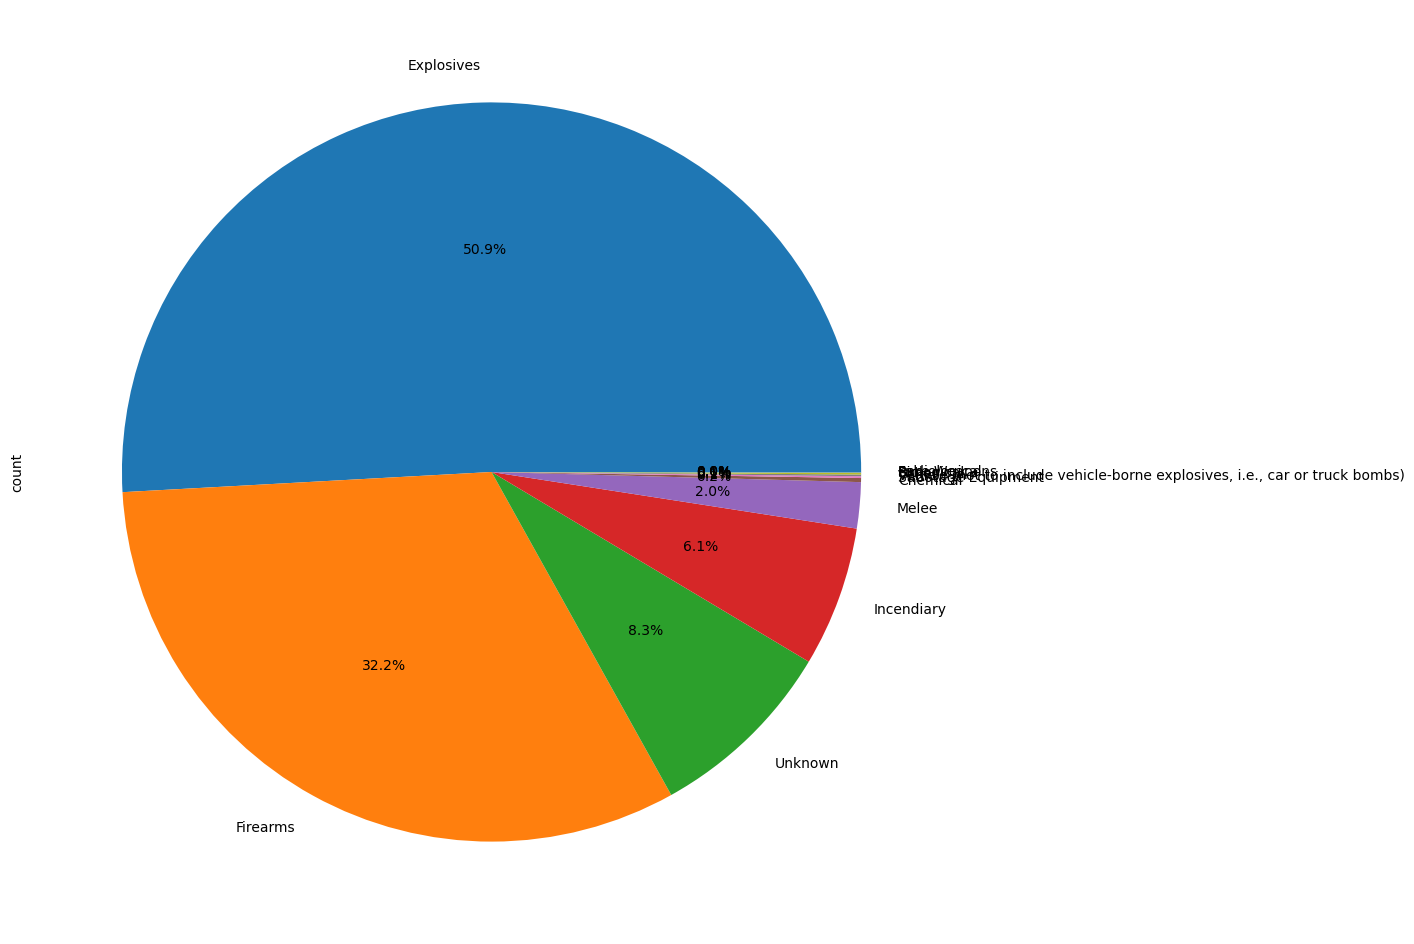

In [166]:
#PIE CHART REPRESENTATION OF EACH TARGET TYPE
df['WEAPON TYPE'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show

#AFFECT OF TERROR ACTIVITES GLOBALLY


#COUNTRIES GET AFFECTED BY EACH TERRORIST GROUP

In [167]:
ff=df[['GNAME','COUNTRY']].value_counts().drop('Unknown')
ff.head(10)

GNAME                                             COUNTRY       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
Name: count, dtype: int64

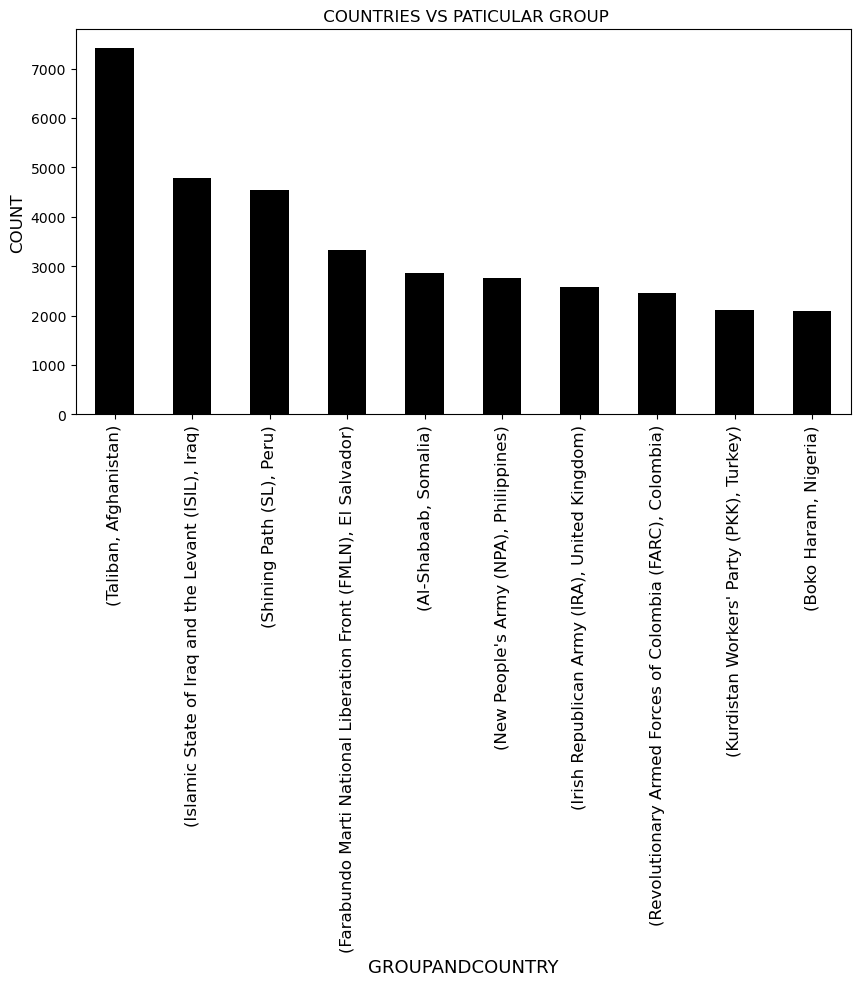

In [168]:
ff.head(10).plot(kind="bar",color="black",figsize=(10,5))
plt.title(" COUNTRIES VS PATICULAR GROUP")
plt.xlabel("GROUPANDCOUNTRY",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("COUNT",fontsize=12)
plt.show()

In [169]:
totalkill = df.loc[:,'KILLED'].sum()
print('TOTAL NUMBER OF KILLED PEOPLE DUE TO TERROR ACTIVITIES :\n',totalkill)

TOTAL NUMBER OF KILLED PEOPLE DUE TO TERROR ACTIVITIES :
 411868.0


#NATURE OF ATTACKS

#piechart reprsentation of attack controlled within 24 hours

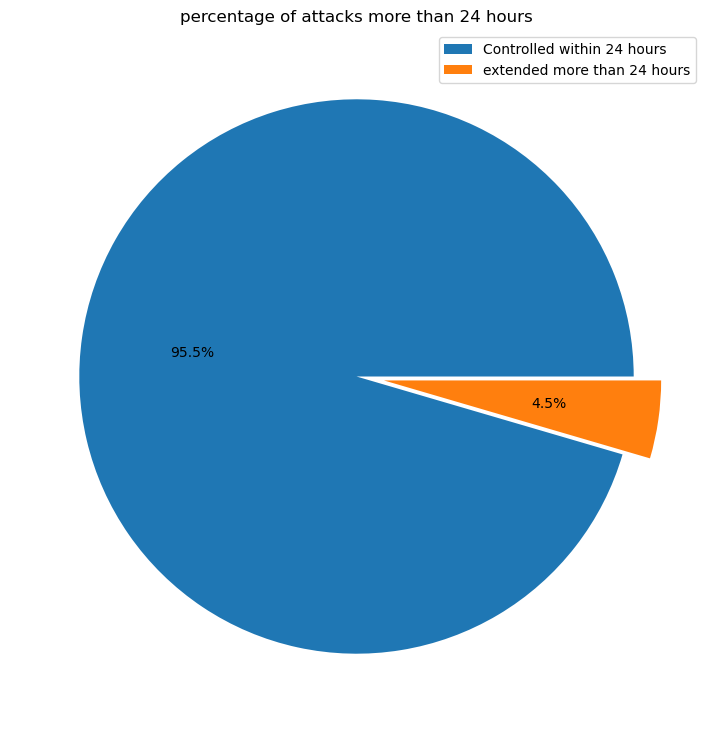

In [171]:
plt.rcParams['figure.figsize']=(10,9)
explode = (0,0.1)
labels = ['Controlled within 24 hours','extended more than 24 hours']
plt.pie(df['extended'].value_counts(), explode=explode,autopct='%1.1f%%')
plt.title('percentage of attacks more than 24 hours')
plt.legend(labels,fontsize=10)
plt.show()

#HISTOGRAM ANALYSIS OF GIVEN DATASET

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>],
       [<Axes: title={'center': 'LATITUDE'}>,
        <Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'KILLED'}>],
       [<Axes: title={'center': 'WOUNDED'}>,
        <Axes: title={'center': 'extended'}>,
        <Axes: title={'center': 'CASUALTY'}>]], dtype=object)

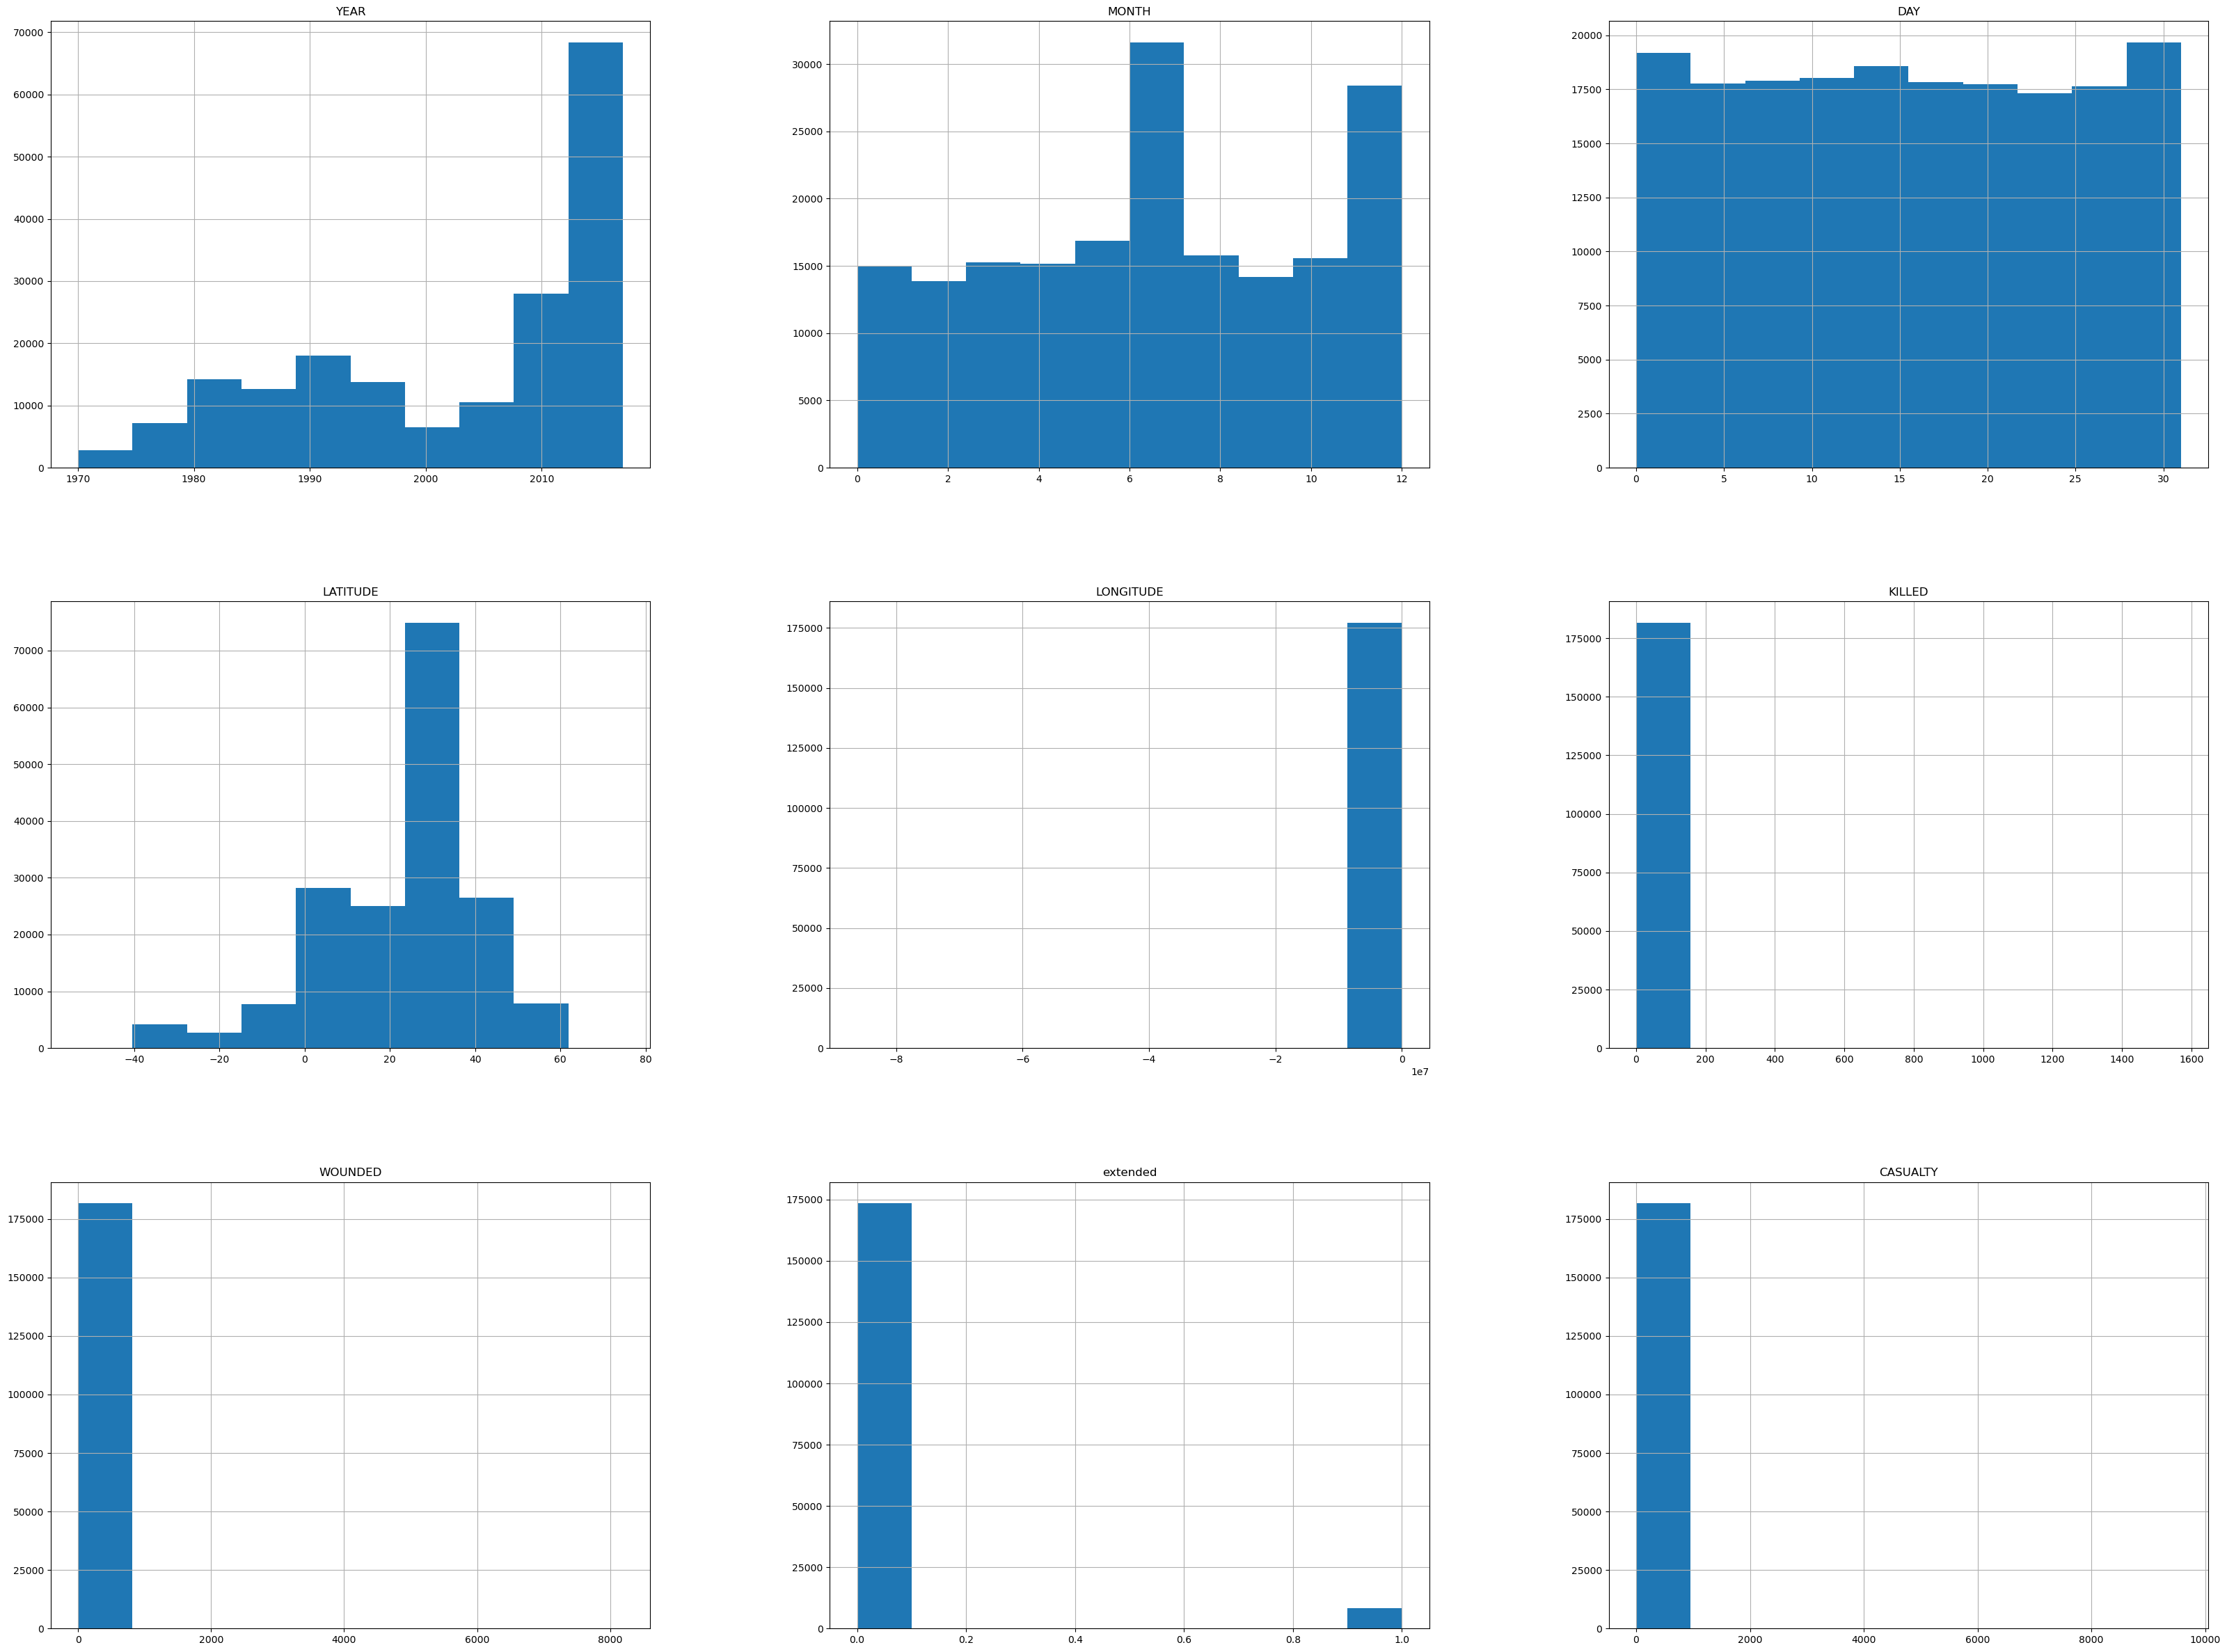

In [172]:
df.hist(figsize=(40,30))

# 🔭 observation 

01.Year with the Highest Number of Attacks: 2014 experienced the most terrorist attacks.

02.Month with the Highest Number of Attacks: The month of May saw the highest number of terrorist attacks.

03.Country Most Frequently Attacked: Iraq was the country most targeted by terrorist attacks.

04.City Most Frequently Attacked: Baghdad was the city that experienced the highest number of terrorist attacks.

05.Region Most Frequently Attacked: The Middle East & North Africa region was the most frequently targeted.

06.Group Involved in the Most Terrorist Activities: The Taliban was the group most involved in terrorist activities.

07.Most Common Type of Attack: Bombing and explosions were the most commonly used attack methods.

08.Most Targeted Casualty Category: Private citizens and property were the most frequently targeted in terrorist attacks.

09.Most Common Types of Weapons Used: Explosives and firearms were the most commonly used weapons in terrorist attacks.

10.Percentage of Attacks Resolved Within 24 Hours: 95.5% of attacks were controlled within the first 24 hours.